In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import healpy as hp
from scipy.interpolate import interp1d

nside = 1024
lmax = 1024*3-1

def iqu2teb(IQU, nside, lmax=None):
    alms = hp.map2alm(IQU, lmax=lmax, pol=True)
    return hp.alm2map(alms, nside=nside, lmax=lmax, pol=False)

def teb2iqu(TEB, nside, lmax=None):
    alms = hp.map2alm(TEB, lmax=lmax, pol=False)
    return hp.alm2map(alms, nside=nside, lmax=lmax, pol=True)

# Begin in Q, U 
### $a_{Q,U} = R \ a_{E,B} + n_{Q,U}$
### $d_{Q,U} = s_{Q,U} + n_{Q,U}$ 
### $\boldsymbol{d} = \boldsymbol{s} + \boldsymbol{n}$


# Algorithm
### $t = T/(T+N) \ d + \bar{N}/(\bar{N} + T) \  s $
### $ s = S/(S+T) \ t $


# Definitions
### $N_{Q,U} = \langle n_{Q,U} n_{Q,U}^\dagger  \rangle $
### $\bar{N} = N - T$
### $ T = \tau \times \mathbf{1}$ , where $\tau = {\rm{min}} \big( N \big)$

# Signal covariance

In [2]:
ell_ee, cell_ee = np.load('namaster_buzzard.npy')
cell_func = interp1d(np.hstack([ell_ee, [ell_ee[-1]+1,1e4]]),
                     np.hstack([cell_ee, [cell_ee[-10]*0.5,1e-15]]),
                     fill_value='extrapolate', kind='linear')

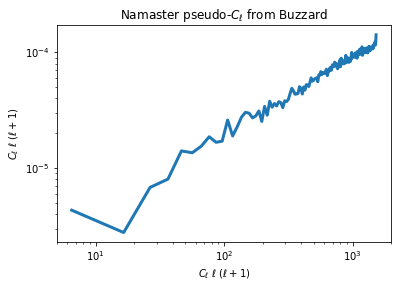

In [6]:
_ = plt.loglog(ell_ee, cell_ee* ell_ee *(ell_ee+1), linewidth=3)
_  =plt.ylabel(r'$C_\ell \ \ell \ (\ell+1)$')
_  =plt.xlabel(r'$C_\ell \ \ell \ (\ell+1)$')
_ = plt.title(r'Namaster pseudo-$C_\ell$ from Buzzard')

In [3]:
ell_cov, mmm_cov = hp.Alm.getlm(nside*3-1)
s_cov_diag =  cell_func(ell_cov)

# Data

In [4]:
data_IQU = hp.read_map('./map_mock_des1024.fits', field=(0,1,2))
data_vec = data_IQU[1] + 1j* data_IQU[2]

NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


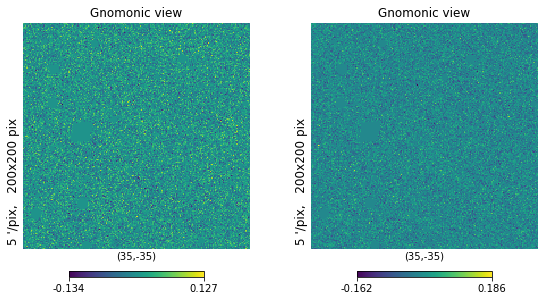

In [5]:
_ = plt.figure(figsize = (12,4)), hp.gnomview(data_vec.real, sub=(1,3,2), reso=5, rot = (35,-35))
_ = hp.gnomview(data_vec.imag, sub=(1,3,3), reso=5, rot = (35,-35))

# Noise covariance

In [6]:
noise_diag = np.load('noise_covariance_des1024.npz')['Cov_N']
noise_diag = noise_diag[:,1,1]*2.

In [7]:
tau = np.min(noise_diag)
print(tau)
T_pixel = np.ones(noise_diag.shape)*tau
T_harmonic = np.ones(hp.map2alm(data_IQU[1], lmax=nside*3-1).shape)*T_pixel[0] / np.float(nside*nside)
print(T_harmonic[0])

0.0003432845140489153
3.2738162426845104e-10


In [8]:
noise_bar_diag = noise_diag - tau

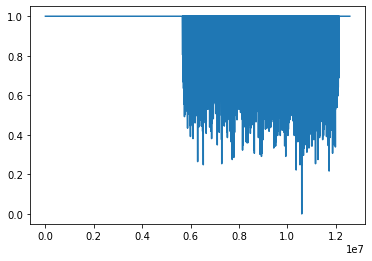

In [9]:
plt.plot(noise_bar_diag/(noise_bar_diag+T_pixel))

# Algorithm

In [10]:
T_harmonic_grade.shape

NameError: name 'T_harmonic_grade' is not defined

In [ ]:
(s_cov_diag_grade/(s_cov_diag_grade+T_harmonic_grade)).shape

In [ ]:
hp.Alm.getlm(512*3-1)[0].shape

In [12]:
n_iter = 30
s = np.zeros(data_vec.shape, dtype='complex')


T_harmonic_grade = np.ones(hp.map2alm(hp.ud_grade(data_IQU[1],1024),
                                      lmax=1024*3-1).shape)*T_pixel[0] / np.float(1024*1024)

s_cov_diag_grade =  cell_func(hp.Alm.getlm(1024*3-1)[0])

harmonic_operator = (s_cov_diag_grade/(s_cov_diag_grade+T_harmonic_grade))
pixel_operator_signal = (noise_bar_diag/(noise_bar_diag+T_pixel))
pixel_operator_data = (T_pixel / (T_pixel + noise_diag))

for i in range(n_iter):
    
    t = pixel_operator_data * data_vec + pixel_operator_signal*s
#     t = hp.ud_grade(t,512)
    
    t_alm1 = hp.map2alm(t.real, lmax = 3*1024-1) 
    t_alm2 = hp.map2alm(t.imag, lmax = 3*1024-1) 
    
    s1 = hp.alm2map(harmonic_operator * t_alm1, nside=1024, lmax=1024*3-1, verbose=False)
    s2 = hp.alm2map(harmonic_operator * t_alm2, nside=1024, lmax=1024*3-1, verbose=False)
    
    s = s1 +1j*s2
    
#     s = hp.ud_grade(s, 128)
#     _ = hp.mollview(s.imag), plt.show()
    print(np.var(s))

1.2407746489220608e-07
2.311421116904013e-07
3.040797039172934e-07
3.5563798795303523e-07
3.928817366215147e-07
4.2010663648502647e-07
4.4016172537609454e-07
4.550249436559421e-07
4.6610109159659295e-07
4.7440008710598824e-07
4.806533681263424e-07
4.853935064538903e-07
4.890099746312156e-07
4.917887173029376e-07
4.939404512283603e-07
4.95621015651424e-07
4.969460706287793e-07
4.980017545313708e-07
4.98852439902477e-07
4.995463976146708e-07
5.001199476984009e-07
5.00600511431179e-07
5.010088629389439e-07
5.013607956178452e-07
5.016683593435245e-07
5.019407818347307e-07
5.021851568518795e-07
5.024069597319922e-07
5.026104346763519e-07
5.027988865025641e-07


In [13]:
s_eb1 = iqu2teb([s*0.,s.real,s.imag], nside, lmax=nside*3-1)

/Users/ucapnje/anaconda3/lib/python3.6/site-packages/healpy/sphtfunc.py:230: ComplexWarning: Casting complex values to real discards the imaginary part
  pixel_weights_filename=pixel_weights_filename,


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [14]:
s_eb = iqu2teb([s*0.,s.real,s.imag], nside, lmax=nside*3-1)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


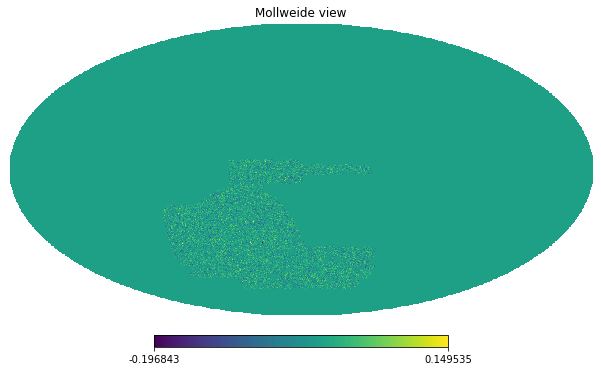

In [15]:
hp.mollview(data_vec.imag)

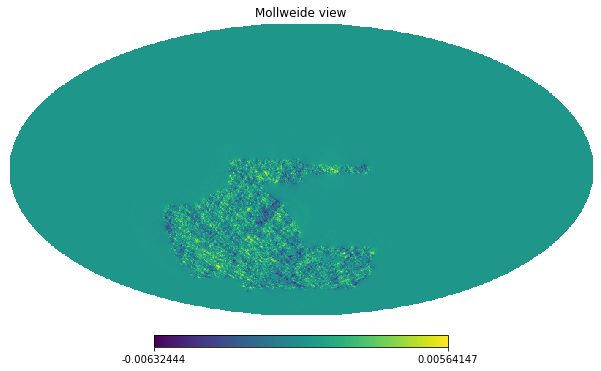

In [16]:
hp.mollview(s.imag)

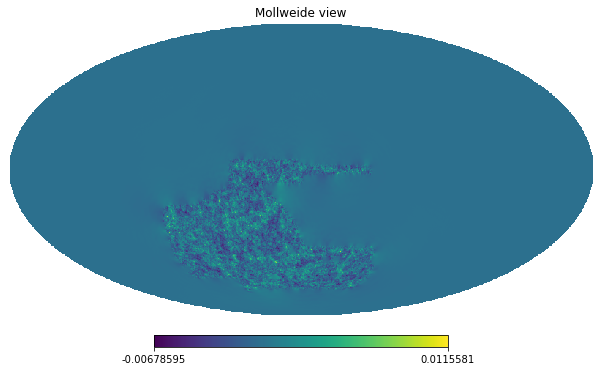

In [17]:
hp.mollview(s_eb1[1])

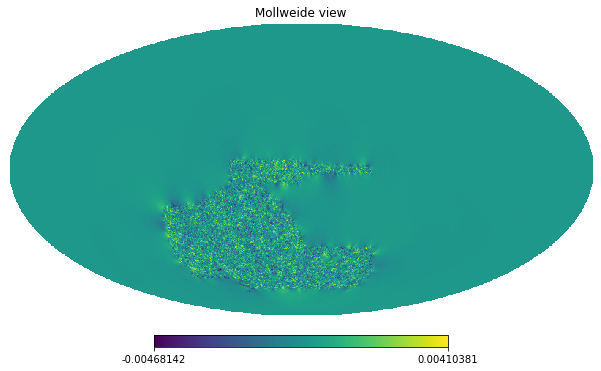

In [18]:
hp.mollview(s_eb1[2])

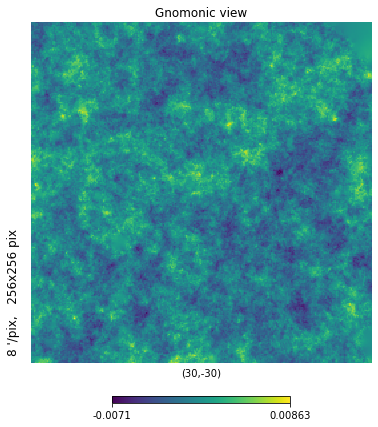

In [19]:
hp.gnomview(s_eb1[1], reso = 8, rot=(30,-30), xsize = 256)

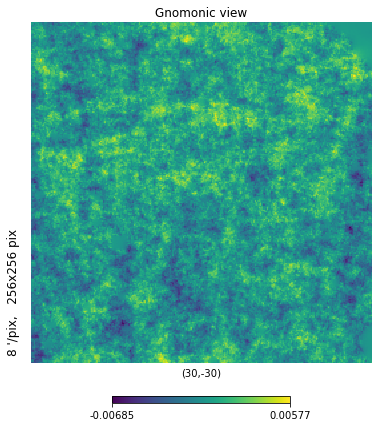

In [20]:
hp.gnomview(s.real, reso = 8, rot=(30,-30), xsize = 256)

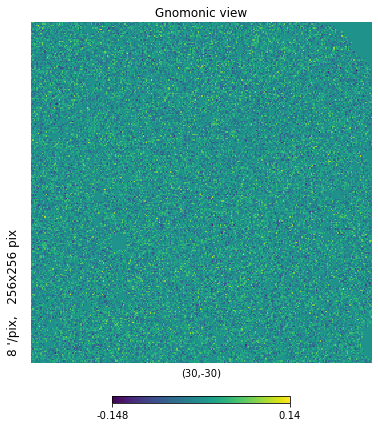

In [21]:
hp.gnomview(data_vec.imag, reso = 8, rot=(30,-30), xsize = 256)

In [25]:
np.save('test_wiener150120', s)

In [31]:
np.save('test_wiener_E_150120', np.array(s_eb1[1], dtype = 'float'))

In [ ]:
ell, emm = hp.Alm.getlm(lmax=lmax)